In [260]:
# Pacotes usados
import pandas as pd # Para pegar os dados dos arquivos
from IPython.display import display # Para mostrar mais de uma informação em uma mesma célula
import ast # Para transformar string/object em estruturas de dados (listas, dicionários, ...)
import numpy as np # Para obter o total de valores por um atributo
from sklearn import linear_model,datasets,svm,tree,neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2
import matplotlib.pyplot as plt
import seaborn as sns
import math

import random
random.seed(1001001)

#colocar:

#http://scikit-learn.org/stable/modules/feature_selection.html

In [261]:
# Carregando dados de cada um dos arquivos
data = pd.read_csv('File/winequality-red.csv',sep=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [262]:
#sns.set(style="ticks")
#sns.pairplot(data,hue="quality")
#plt.show()

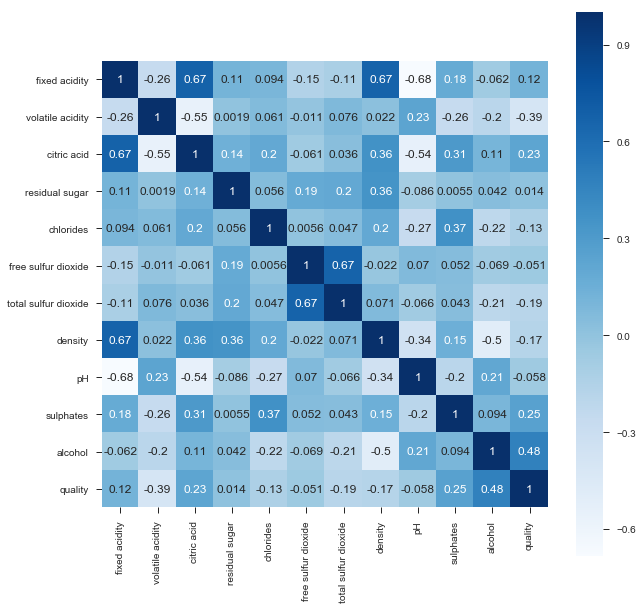

In [263]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

In [264]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = data[features]
Y = data['quality']
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)


In [265]:
def present(x,y,h):
    fig = plt.figure(figsize = (15,15))
    size = len(data.columns)
    for i in range(0,size-1):
        ax = fig.add_subplot(math.ceil(math.sqrt(size-1)), math.ceil(math.sqrt(size-1)), i+1)
        ax.scatter(x.iloc[:,i], y,  color='red')
        ax.scatter(x.iloc[:,i], h, color='blue', linewidth=3)
    plt.show()
    #sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
    #plt.show()

In [266]:
def test(regr,X_train,Y_train,X_test,Y_test,linear=False):
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    if linear:
        print('Coefficients: \n', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    print('Variance score: %.2f' % r2_score(Y_test, Y_pred))
    return Y_pred,mean_squared_error(Y_test, Y_pred),r2_score(Y_test, Y_pred)

In [285]:
methods = [
        linear_model.LinearRegression(),
        svm.SVR(),
        linear_model.SGDRegressor(max_iter=1000,tol=1e-3,loss="huber"),
        NearestCentroid(),
        tree.DecisionTreeRegressor(),
        neural_network.MLPRegressor(solver='lbfgs')
    ]
def test_all(X_train,Y_train,X_test,Y_test):
    errors = []
    scores = []
    for method in methods:
        print(method.__class__.__name__)
        print()
        Y_pred,error,score = test(method,X_train,Y_train,X_test,Y_test)
        print()
        scores = scores + [score]
        errors = errors + [error]
    return errors,scores

Coefficients: 
 [ 2.95854290e-02 -1.06351951e+00 -8.61978237e-02  1.19198890e-02
 -1.80691147e+00  4.54673553e-03 -3.49742782e-03 -2.41406808e+01
 -2.97511257e-01  8.84772648e-01  2.69126348e-01]
Mean squared error: 0.42
Variance score: 0.37


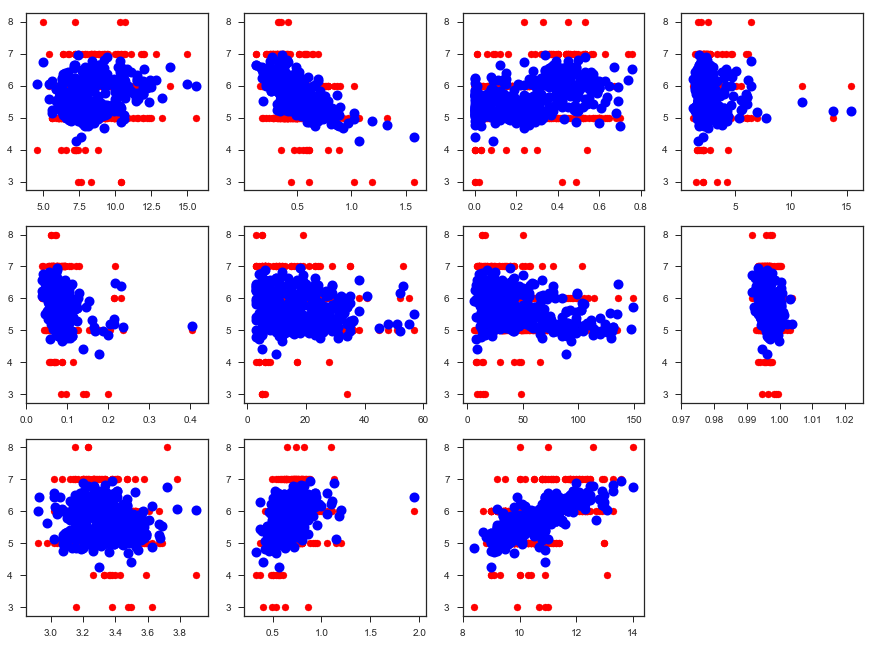

In [268]:
Y_pred,_,_ = test(linear_model.LinearRegression(),X_train,Y_train,X_test,Y_test,True)
present(X_test,Y_test,Y_pred)

Mean squared error: 0.49
Variance score: 0.26


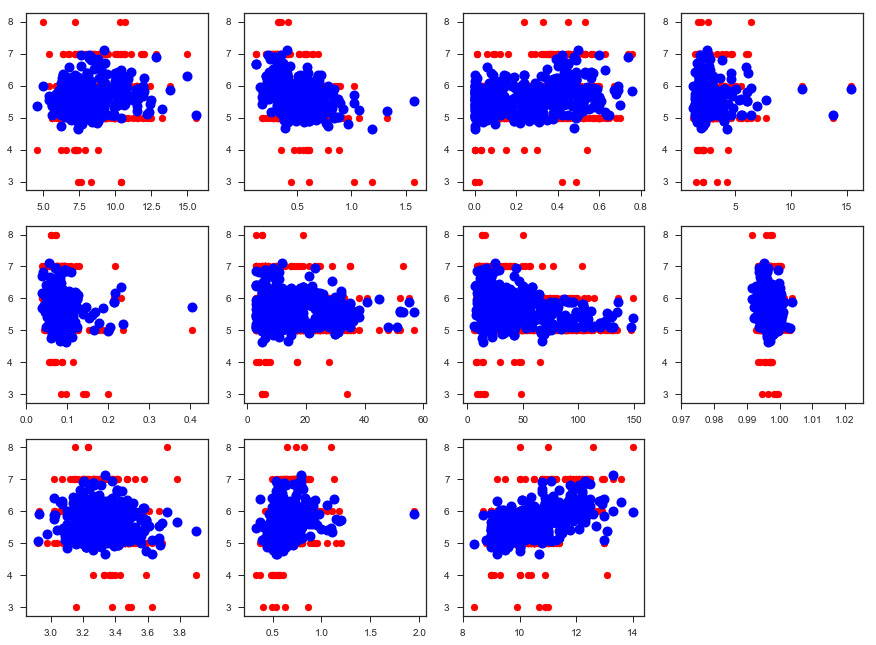

In [269]:
Y_pred,_,_ = test(svm.SVR(),X_train,Y_train,X_test,Y_test)
present(X_test,Y_test,Y_pred)

Mean squared error: 366249613695355669446656.00
Variance score: -555786810873486390591488.00
Mean squared error: 1.65
Variance score: -1.50
Mean squared error: 0.80
Variance score: -0.22


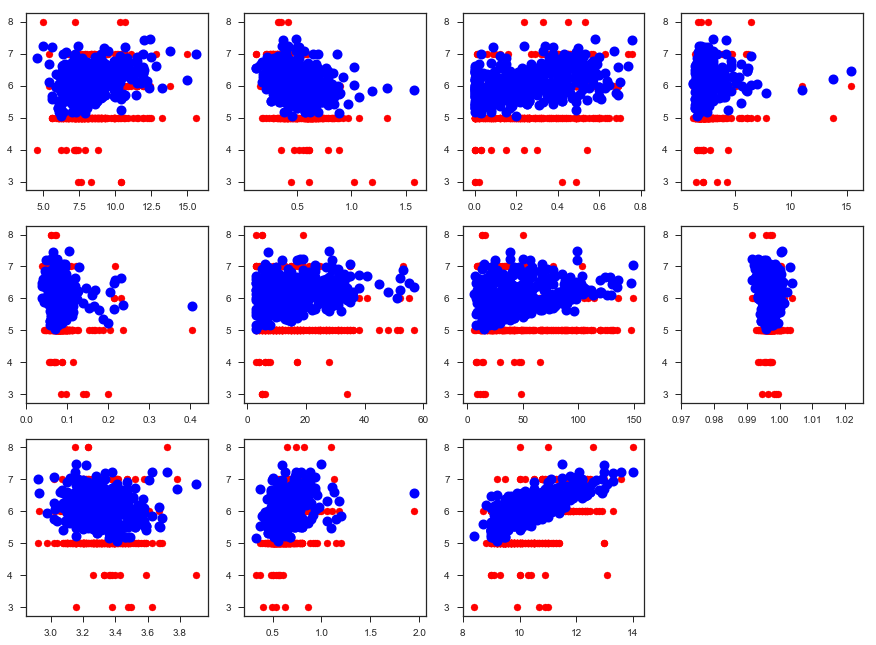

In [270]:
Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3),X_train,Y_train,X_test,Y_test)
Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3,loss="epsilon_insensitive"),X_train,Y_train,X_test,Y_test)
Y_pred,_,_ = test(linear_model.SGDRegressor(max_iter=1000,tol=1e-3,loss="huber"),X_train,Y_train,X_test,Y_test)
present(X_test,Y_test,Y_pred)

Mean squared error: 4.29
Variance score: -5.52


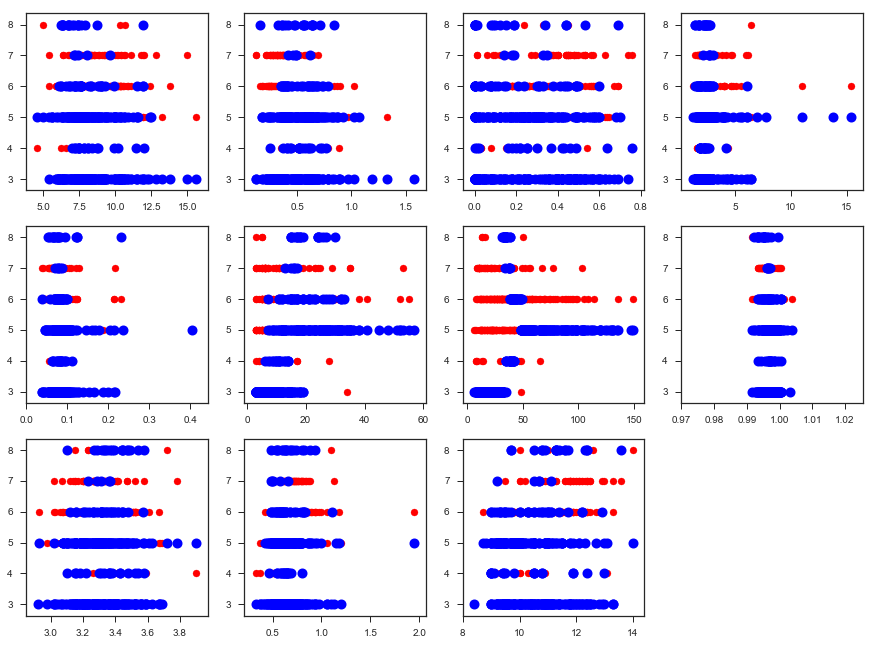

In [271]:
Y_pred,_,_ = test(NearestCentroid(),X_train,Y_train,X_test,Y_test)
present(X_test,Y_test,Y_pred)

Mean squared error: 0.65
Variance score: 0.02


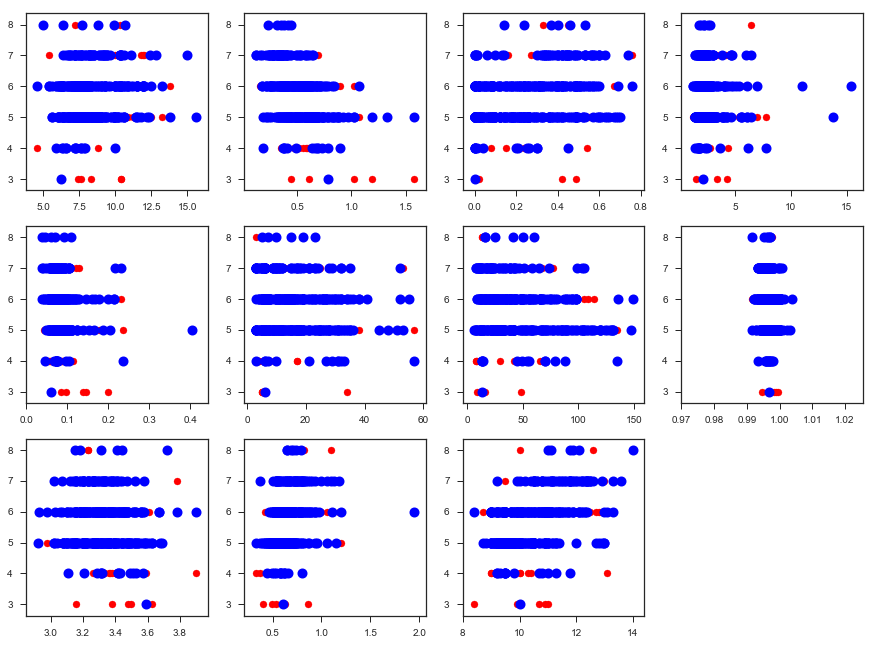

In [272]:
Y_pred,_,_ = test(tree.DecisionTreeRegressor(),X_train,Y_train,X_test,Y_test)
present(X_test,Y_test,Y_pred)

Mean squared error: 0.45
Variance score: 0.32


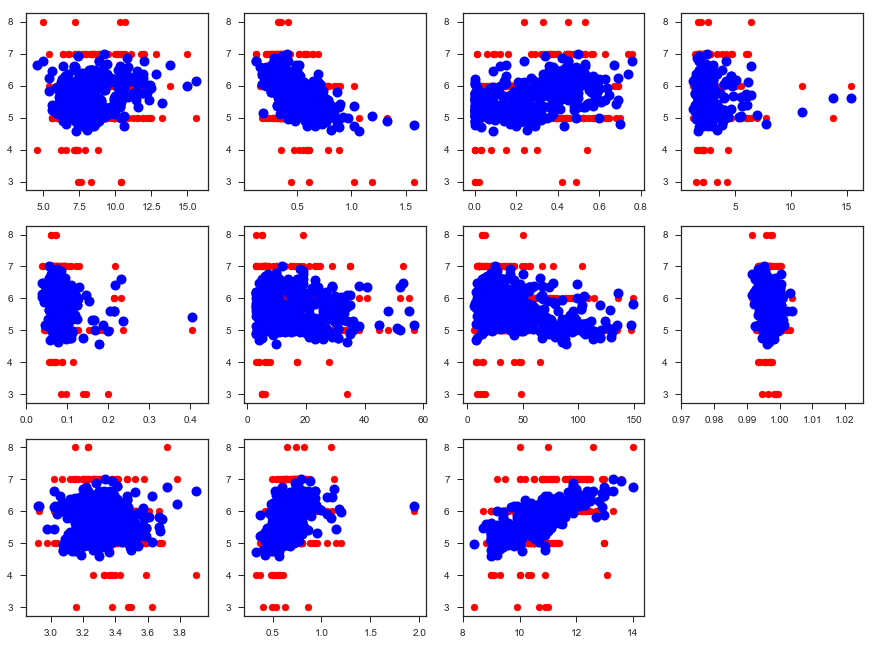

In [273]:
Y_pred,_,_ = test(neural_network.MLPRegressor(solver='lbfgs'),X_train,Y_train,X_test,Y_test)
present(X_test,Y_test,Y_pred)

In [274]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = data[features]
Y = data['quality']
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()


In [275]:
X = data[features]
print(np.shape(X))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X1 = sel.fit_transform(X)
print(np.shape(X1))
X2 = SelectKBest(chi2, k=2).fit_transform(X, Y)
print(np.shape(X2))
X3 = SelectKBest(chi2, k=5).fit_transform(X, Y)
print(np.shape(X3))
#sns.pairplot(data,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)
#plt.show()

(1599, 11)
(1599, 5)
(1599, 2)
(1599, 5)


In [276]:
rand = random.randrange(0,100)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y,random_state=rand,test_size=0.25)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y,random_state=rand,test_size=0.25)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y,random_state=rand,test_size=0.25)

In [286]:
error0,score0 = test_all(X_train,Y_train,X_test,Y_test)

LinearRegression

Mean squared error: 0.42
Variance score: 0.37

SVR

Mean squared error: 0.49
Variance score: 0.26

SGDRegressor

Mean squared error: 0.89
Variance score: -0.35

NearestCentroid

Mean squared error: 4.29
Variance score: -5.52

DecisionTreeRegressor

Mean squared error: 0.63
Variance score: 0.04

MLPRegressor

Mean squared error: 0.45
Variance score: 0.31



In [287]:
error1,score1 = test_all(X1_train,Y1_train,X1_test,Y1_test)

LinearRegression

Mean squared error: 0.47
Variance score: 0.25

SVR

Mean squared error: 0.50
Variance score: 0.18

SGDRegressor

Mean squared error: 0.67
Variance score: -0.09

NearestCentroid

Mean squared error: 4.20
Variance score: -5.79

DecisionTreeRegressor

Mean squared error: 0.88
Variance score: -0.41

MLPRegressor

Mean squared error: 0.48
Variance score: 0.22



In [288]:
error2,score2 = test_all(X2_train,Y2_train,X2_test,Y2_test)

LinearRegression

Mean squared error: 0.60
Variance score: 0.03

SVR

Mean squared error: 0.65
Variance score: -0.05

SGDRegressor

Mean squared error: 8.82
Variance score: -13.26

NearestCentroid

Mean squared error: 4.23
Variance score: -5.84

DecisionTreeRegressor

Mean squared error: 0.98
Variance score: -0.58

MLPRegressor

Mean squared error: 0.59
Variance score: 0.04



In [293]:
error3,score3 = test_all(X3_train,Y3_train,X3_test,Y3_test)

LinearRegression

Mean squared error: 0.42
Variance score: 0.32

SVR

Mean squared error: 0.51
Variance score: 0.18

SGDRegressor

Mean squared error: 1.40
Variance score: -1.27

NearestCentroid

Mean squared error: 4.19
Variance score: -5.78

DecisionTreeRegressor

Mean squared error: 0.64
Variance score: -0.03

MLPRegressor

Mean squared error: 0.43
Variance score: 0.30



In [299]:
tabelascores = pd.DataFrame(data={'no filtering':score0,'variance (80%)':score1,'chi2 k = 2':score2,'chi2 k =5':score3},
                      index=[method.__class__.__name__ for method in methods])


def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


tabelascores.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LinearRegression,0.0269687,0.316639,0.36876,0.245544
SVR,-0.0512341,0.180907,0.263726,0.183715
SGDRegressor,-13.2613,-1.27003,-0.346423,-0.0864673
NearestCentroid,-5.83515,-5.77856,-5.5177,-5.79473
DecisionTreeRegressor,-0.581205,-0.0266878,0.0439698,-0.414727
MLPRegressor,0.0418875,0.296957,0.312987,0.21875


In [300]:
tabelaerros = pd.DataFrame(data={'no filtering':error0,'variance (80%)':error1,'chi2 k = 2':error2,'chi2 k =5':error3},
                      index=[method.__class__.__name__ for method in methods])


def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


tabelascores.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,chi2 k = 2,chi2 k =5,no filtering,variance (80%)
LinearRegression,0.0269687,0.316639,0.36876,0.245544
SVR,-0.0512341,0.180907,0.263726,0.183715
SGDRegressor,-13.2613,-1.27003,-0.346423,-0.0864673
NearestCentroid,-5.83515,-5.77856,-5.5177,-5.79473
DecisionTreeRegressor,-0.581205,-0.0266878,0.0439698,-0.414727
MLPRegressor,0.0418875,0.296957,0.312987,0.21875
